# **Predicción de diabetes basado en indicadores de salud asociados a la misma.**
El diagnóstico precoz de la diabetes es importante para prevenir la aparición de complicaciones. En este proyecto, analizaré los datos de la encuesta sobre indicadores de salud que pueden estar asociados con la diabetes.
Hay dos objetivos principales de este proyecto:


*   Conocer los indicadores que más se asocian con la diabetes
*   Construir un modelo para predecir la diabetes

Comenzaré explorando los datos en un conjunto de datos equilibrado y luego crearé un modelo para predecir la diabetes. Compararé el rendimiento del modelo y aplicaré el ajuste de hiperparámetros para mejorar el rendimiento del modelo. El modelo final se utilizará para predecir la diabetes en un conjunto de datos de prueba desequilibrado.




In [ ]:
#Librerias utilizadas para el análisis y visualización de datos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Funciones para realizar la estandarización de características y dividir los datos en conjuntos de entrenamiento y prueba.
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Importa algoritmos de clasificación de la libreria scikit-learn (sklearn). 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#Métricas de evaluación de modelos de la libreria scikit-learn. 
#Se utilizan para evaluar y comparar el rendimiento de los modelos de clasificación.
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

#Funciones para realizar la búsqueda de hiperparámetros en modelos de aprendizaje automático, 
#lo que ayuda a encontrar la mejor combinación de hiperparámetros para un modelo específico.
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

sns.set_style('white')
sns.set_palette("pastel")

## DATOS

In [ ]:
# Train_data Cargar el archivo CSV
train = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
# Test_data
test = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

# Los datos tiene que tener el mismo numeor de columnas
print(f"train shape: {train.shape}")
print(f"test shape: {test.shape}")

# columnas
print(train.columns == test.columns)

train shape: (70692, 22)
test shape: (253680, 22)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [ ]:
# Tipo de datos
print(train.dtypes)

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


Información de dataset

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Tenemos datasets limpios. No hay valores faltantes y todos los datos son tipos float.

In [ ]:
#NO SE SI SI ES LO QUE QUIERE JSJSJSJS

data_encoded = pd.get_dummies(train)

data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

## Exploratory data analysis
En esta sección, se revisarán los datos de entrenamiento para saber más de los datos. Se aplicará a todos los sujetos, inluidos los grupos de diabetes y no diabetes.

In [ ]:
# describe los datos
train.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
#valores unicos de cada variable
for col in train.columns:
    print(f"{col}: {np.sort(train[col].unique())}")

Diabetes_binary: [0. 1.]
HighBP: [0. 1.]
HighChol: [0. 1.]
CholCheck: [0. 1.]
BMI: [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.
 84. 85. 86. 87. 89. 92. 95. 98.]
Smoker: [0. 1.]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0. 1.]
PhysActivity: [0. 1.]
Fruits: [0. 1.]
Veggies: [0. 1.]
HvyAlcoholConsump: [0. 1.]
AnyHealthcare: [0. 1.]
NoDocbcCost: [0. 1.]
GenHlth: [1. 2. 3. 4. 5.]
MentHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
PhysHlth: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]
DiffWalk: [0. 1.]
Sex: [0. 1.]
Age: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
Education: [1

In [ ]:
#categorias
socialecom = ['Age', 'Sex', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']
enfermedad = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
salud = ['GenHlth', 'MentHlth', 'PhysHlth']
habitos = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

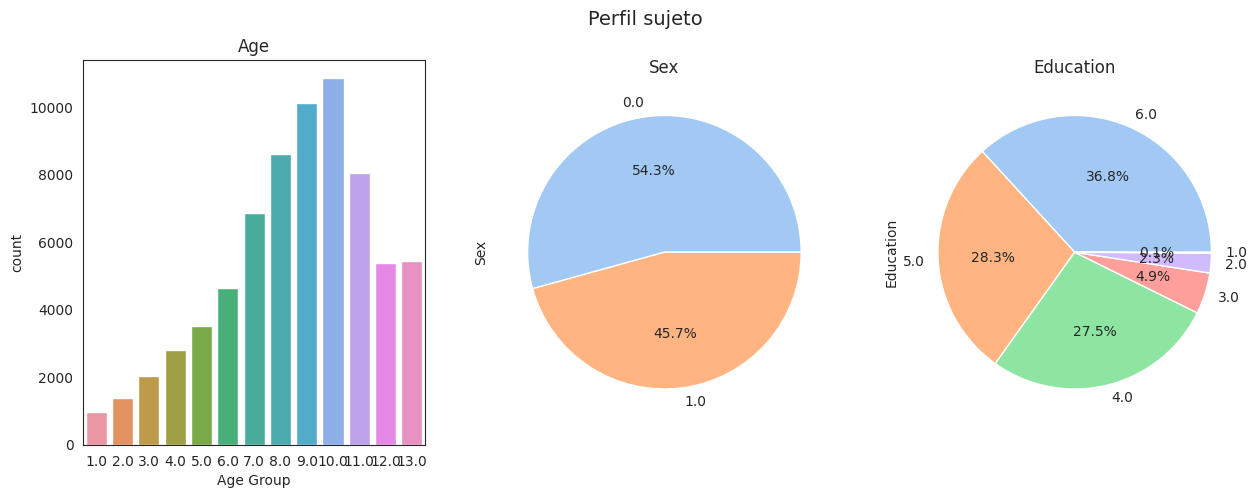

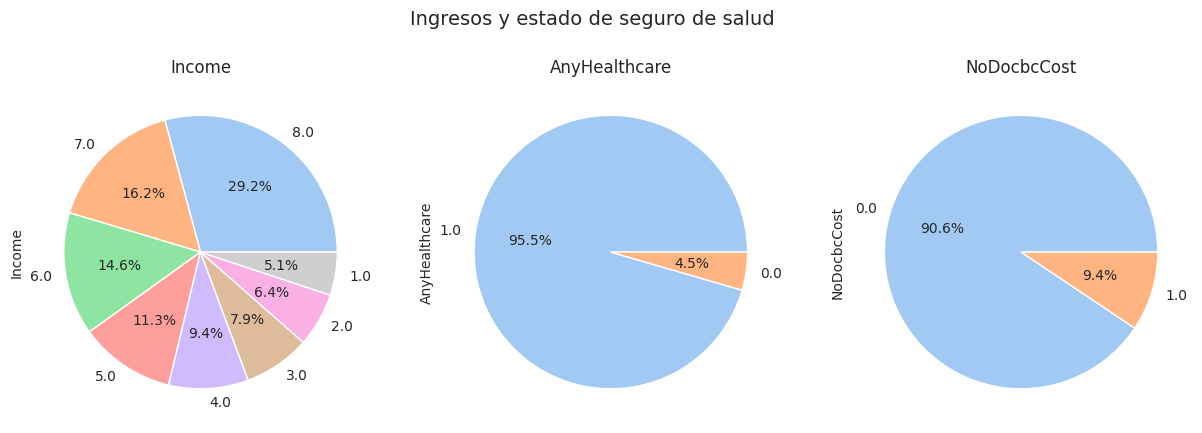

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes = axes.flatten()
sns.countplot(x='Age', data=train, ax=axes[0])
axes[0].set_title('Age')
axes[0].set_xlabel('Age Group')

for i, col in enumerate(['Sex', 'Education']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i+1], title=col)
plt.suptitle('Perfil sujeto', fontsize=14)
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
for i, col in enumerate(['Income', 'AnyHealthcare', 'NoDocbcCost']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], title=col)
plt.suptitle('Ingresos y estado de seguro de salud', fontsize=14)
plt.show()

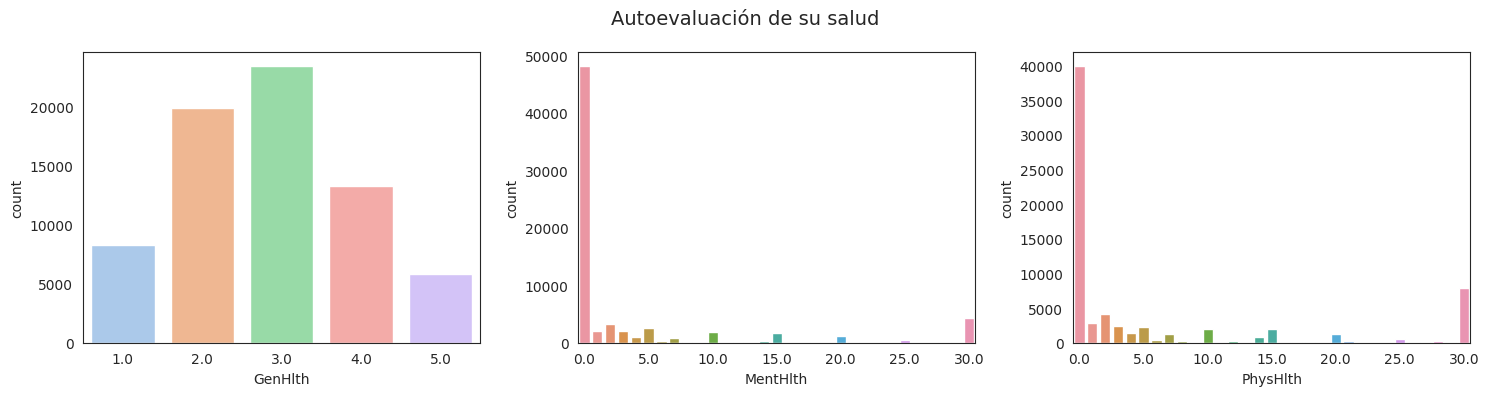

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
for i, col in enumerate(salud):
    g = sns.countplot(x=col, data=train, ax=axes[i])
    if len(train[col].unique()) > 5:
        g.set_xticks(np.arange(0, len(train[col].unique()), 5))
plt.suptitle('Autoevaluación de su salud', fontsize=14)
plt.tight_layout()
plt.show()

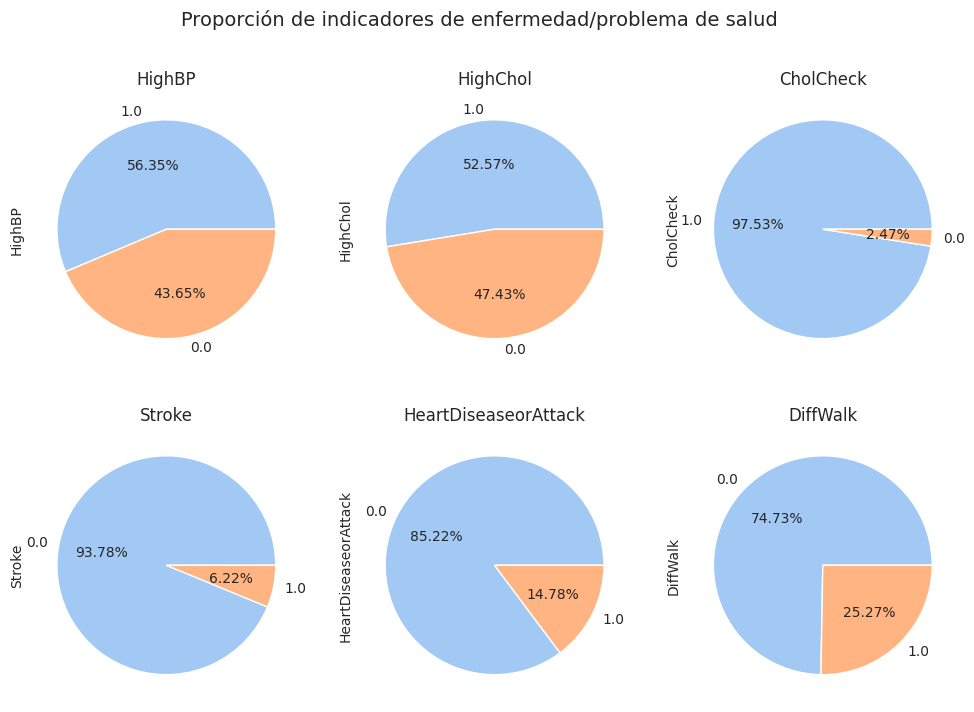

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(enfermedad):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proporción de indicadores de enfermedad/problema de salud', fontsize=14)
plt.show()

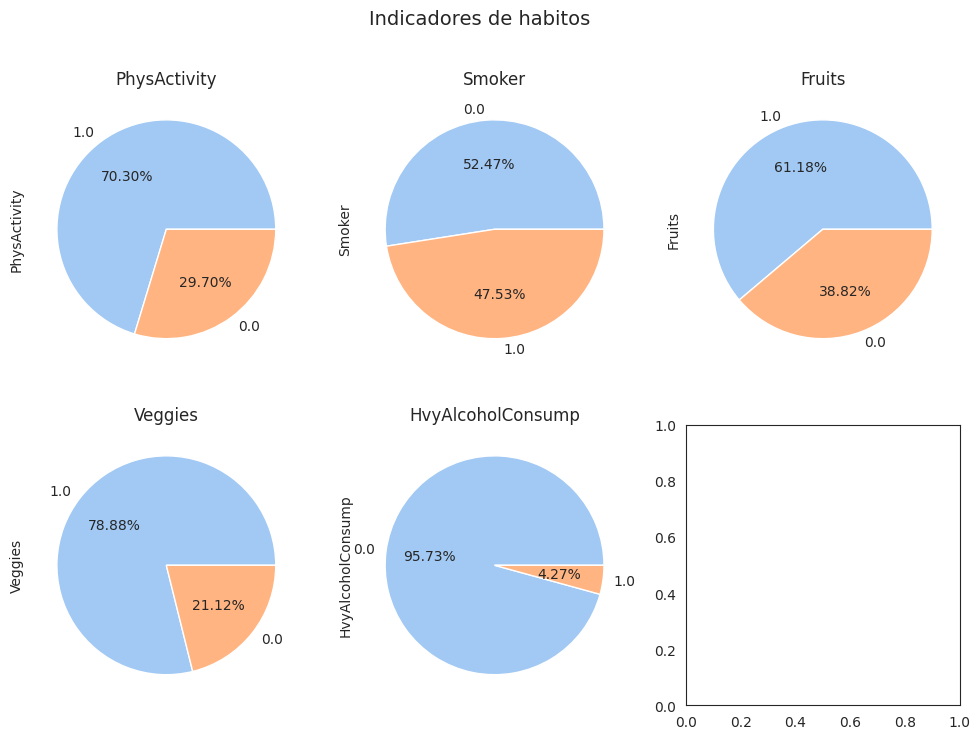

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(habitos):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Indicadores de habitos', fontsize=14)
plt.show()

#Variables numéricas
Trazar la distribución del IMC

La Organización Mundial de la Salud (OMS) define los siguientes rangos de IMC para adultos:

* Bajo peso: IMC inferior a 18,5
* Peso normal: IMC entre 18,5 y 24,9
* Sobrepeso: IMC entre 25 y 29,9
* Obesidad: IMC de 30 o más

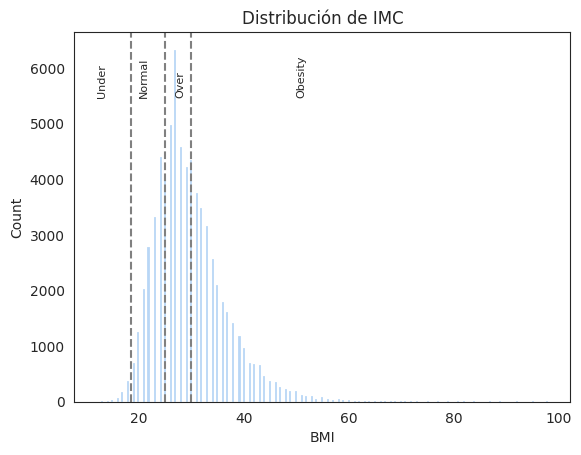

In [ ]:
plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')

# add text
plt.text(12, 5500, 'Under', rotation=90, size=8)
plt.text(20, 5500, 'Normal', rotation=90, size=8)
plt.text(27, 5500, 'Over', rotation=90, size=8)
plt.text(50, 5500, 'Obesity', rotation=90, size=8)

sns.histplot(train['BMI'], kde=False)

plt.title('Distribución de IMC')
plt.show()

# Relación entre las características y el objetivo

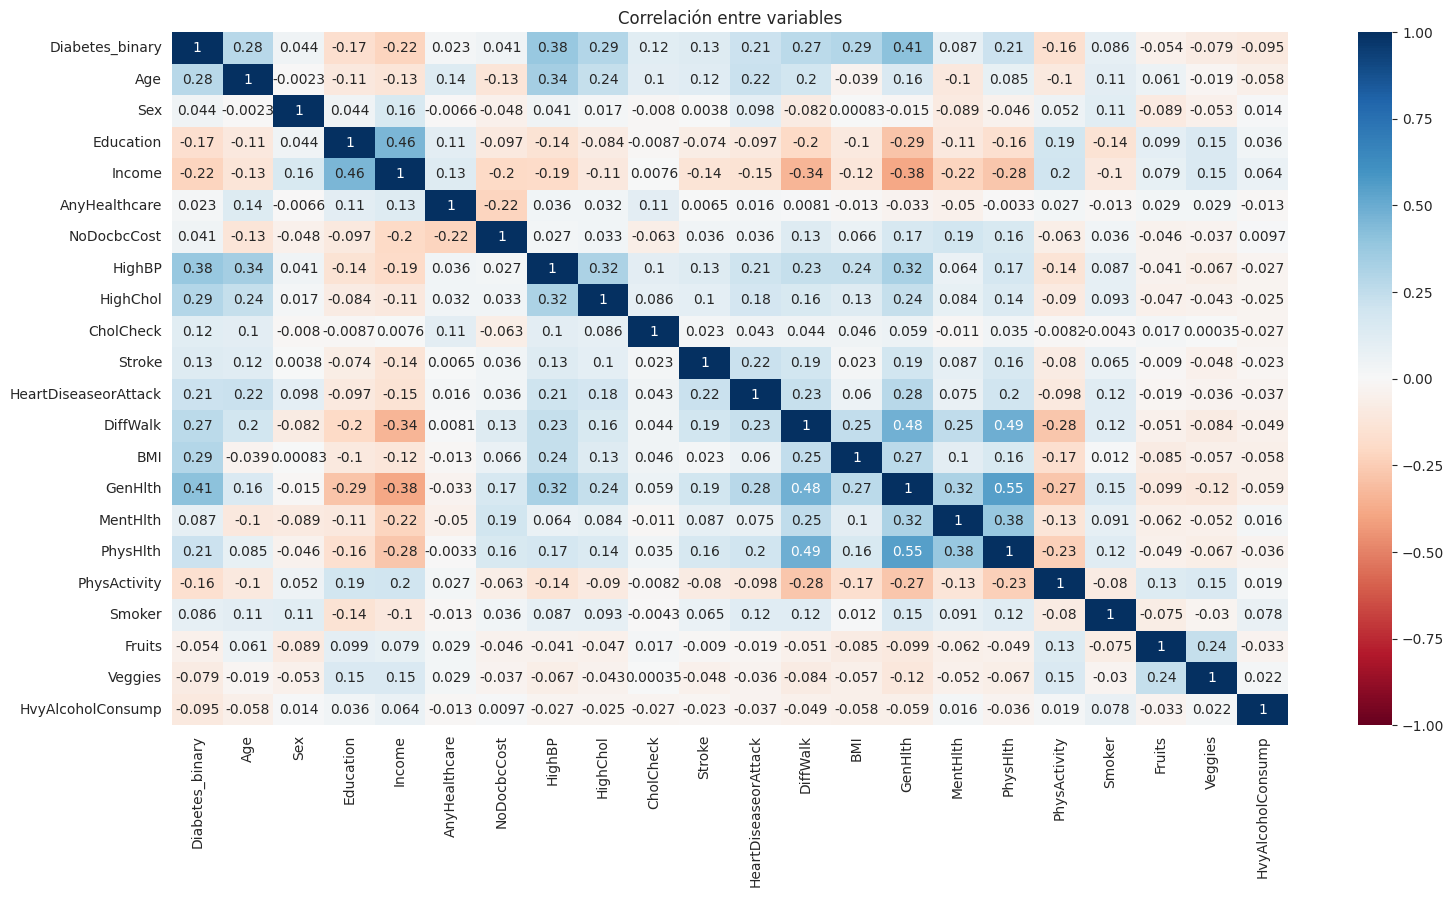

In [ ]:
# trazar un heatmap para comprobar la correlación entre las variables

# para una mejor agrupación e interpretación, ordené las columnas según la lista de columnas creada anteriormente
cols = ['Diabetes_binary'] + socialecom + enfermedad +  ['BMI'] + salud + habitos

plt.figure(figsize=(18, 9))
# nomralize the color scale
sns.heatmap(train[cols].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlación entre variables')
plt.show()

In [ ]:
# Las 10 principales variables que están correlacionadas con la variable objetivo: usé el valor absoluto para obtener la correlación absoluta
train.corr()['Diabetes_binary'].abs().sort_values(ascending=False).head(15)

Diabetes_binary         1.000000
GenHlth                 0.407612
HighBP                  0.381516
BMI                     0.293373
HighChol                0.289213
Age                     0.278738
DiffWalk                0.272646
Income                  0.224449
PhysHlth                0.213081
HeartDiseaseorAttack    0.211523
Education               0.170481
PhysActivity            0.158666
Stroke                  0.125427
CholCheck               0.115382
HvyAlcoholConsump       0.094853
Name: Diabetes_binary, dtype: float64

# Indicadores más importantes basados ​​en resultados de correlación
¡Interesante! La diabetes parece correlacionada positivamente con la edad y negativamente con los ingresos.

Parece que los sujetos evaluaron bastante su estado de salud: si piensan que su salud es mala, es más probable que tengan diabetes. Se puede encontrar una correlación similar entre tener diabetes y la evaluación del estado físico.

Las medidas físicas se correlacionan con la diabetes, lo que se espera. La presión arterial alta, el IMC alto y el colesterol alto se correlacionan con tener diabetes.

Los problemas de salud y las enfermedades están más relacionados con la diabetes que con los hábitos de salud. Por ejemplo, la posibilidad de sufrir un ataque al corazón, un derrame cerebral o dificultades para caminar se correlaciona con tener diabetes.

Entre los hábitos de salud, si realizar actividad física en los últimos 30 días (PhysActivity) es el que más se correlaciona con la diabetes (de forma negativa).

En general, los resultados de la correlación muestran algunos indicadores que son más efectivos para predecir la diabetes. Nótese que no puede implicar causalidad. Por ejemplo, la correlación entre la diabetes y la PA es positiva, pero no significa que la PA alta cause diabetes. Para el siguiente paso, utilizaremos modelos de aprendizaje automático para predecir la diabetes en función de los indicadores.

# Modelos de machine learning
La variable objetivo de la predicción es Diabetes (1 para (pre)diabetes, 0 para no diabéticos). Las variables de características son todas las demás variables. Por lo tanto, el problema es un problema de clasificación binaria. Probaré los siguientes modelos para predecir la diabetes:

* Regresión logística
* Árbol de decisión
* Bosque aleatorio
* Máquinas de soporte vectorial
* K-vecinos más cercanos
* Naive Bayes

El modelo se entrenará con los datos de entrenamiento y se probará con los datos de prueba.

## Preprocesamiento

In [ ]:
# dividir los datos en X e y
X = train.drop('Diabetes_binary', axis=1)
y = train['Diabetes_binary']

# dividir los datos entre entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = test.drop('Diabetes_binary', axis=1)
y_test = test['Diabetes_binary']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Ajuste y evaluación del modelo

In [ ]:
# crear función para evaluar el modelo

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(y_train, y_train_pred)],
                        'train_precision': [precision_score(y_train, y_train_pred)],
                        'train_recall': [recall_score(y_train, y_train_pred)],
                        'train_f1': [f1_score(y_train, y_train_pred)],
                        'train_roc_auc': [roc_auc_score(y_train, y_train_pred)],
                        
                        'val_accuracy': [accuracy_score(y_val, y_val_pred)],
                        'val_precision': [precision_score(y_val, y_val_pred)],
                        'val_recall': [recall_score(y_val, y_val_pred)],
                        'val_f1': [f1_score(y_val, y_val_pred)],
                        'val_roc_auc': [roc_auc_score(y_val, y_val_pred)]})
    return df


In [ ]:
#modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}
#iterar y evaluar cada modelo
results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, X_train, y_train, X_val, y_val)
    model_results['model'] = name
    results_l.append(model_results)
# concatenar los resultados
results = pd.concat(results_l, axis=0).reset_index(drop=True)
results.sort_values(by='val_accuracy', ascending=False)

,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc,model
0,0.748077,0.738670,0.768350,0.753218,0.748062,0.748497,0.737264,0.769896,0.753227,0.748559,Logistic Regression
4,0.765494,0.740645,0.817649,0.777244,0.765456,0.748143,0.721939,0.804795,0.761119,0.748307,SVM
2,0.995102,0.995964,0.994240,0.995101,0.995103,0.738100,0.718464,0.780536,0.748215,0.738223,Random Forest
5,0.719644,0.725235,0.707884,0.716455,0.719652,0.718014,0.719845,0.711165,0.715478,0.717994,Naive Bayes
3,0.797181,0.782740,0.823126,0.802425,0.797163,0.709880,0.697706,0.737693,0.717142,0.709961,KNN
1,0.995137,0.999537,0.990741,0.995119,0.995140,0.647712,0.646210,0.648319,0.647263,0.647714,Decision Tree


Parece que los modelos de Random Forest y el árbol de decisión están sobreajustados: la precisión de los datos de entrenamiento es mucho mayor que los de prueba.

La regresión logística tiene los números más altos en accuracy score y ROC AUC score en los datos de prueba. Usaremos este modelo para predecir la diabetes.

#Hiperparámetros


In [ ]:
#RandomizedSearchCV
# randomized search para hiperparámetros

# define los parámetros
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}


# crear modelo
logreg = LogisticRegression()

# crear randomized search
random_search = RandomizedSearchCV(logreg, param_grid, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# ajuste de modelo
random_search.fit(X_train, y_train)

# imprime los mejores parámetros
print(random_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 300, 'C': 0.01}


#GirdSearchCV
Aplicar grid search para encontrar los mejores parámetros

Crear la grilla de parámetros basada en los resultados de la búsqueda aleatoria

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# crear el modelo
logreg = LogisticRegression()

# crear grid search
grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)

# ajuste del modelo
grid_search.fit(X_train, y_train)

# mejores parámetros
print(grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
# evaluar el modelo con los mejores parámetros
best_model = LogisticRegression(**grid_search.best_params_)
evaluate_model(best_model, X_train, y_train, X_val, y_val)


,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc
0,0.748077,0.737363,0.771212,0.753908,0.74806,0.748002,0.735604,0.772024,0.753374,0.748071



Después del ajuste de hiperparámetros, el F1 score en los datos de validación mejoran ligeramente.

# Importancia de las características

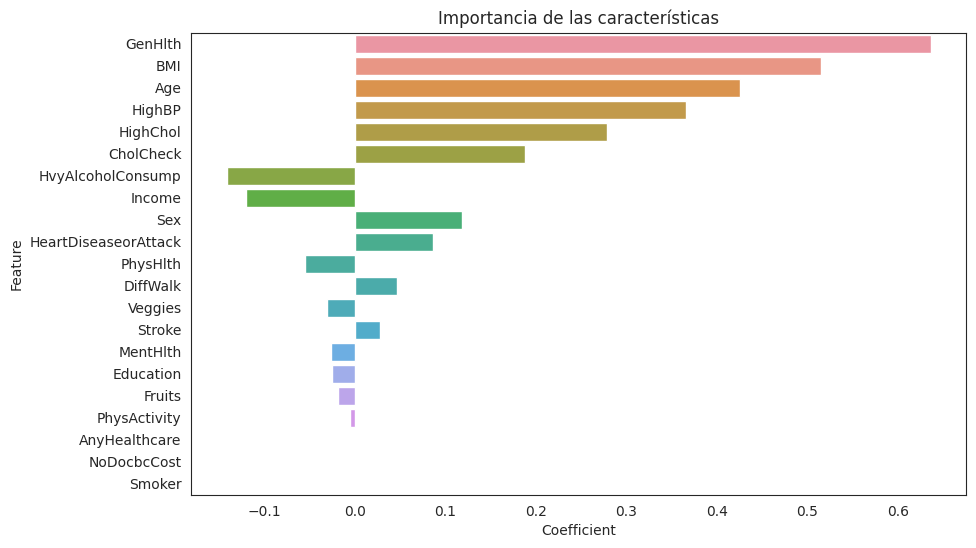

In [ ]:
# graficar la importancia de las características
# Crear  DataFrame con los nombres de las carcaterísticas y sus coeficientes 


feature_importance = pd.DataFrame({'feature': X.columns, 'coefficient': best_model.coef_[0]})

# Ordenar en orden descendiente 
feature_importance['abs_coefficient'] = feature_importance['coefficient'].abs()
feature_importance.sort_values(by='abs_coefficient', ascending=False, inplace=True)

# Gráfica
plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=feature_importance)
plt.title('Importancia de las características')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

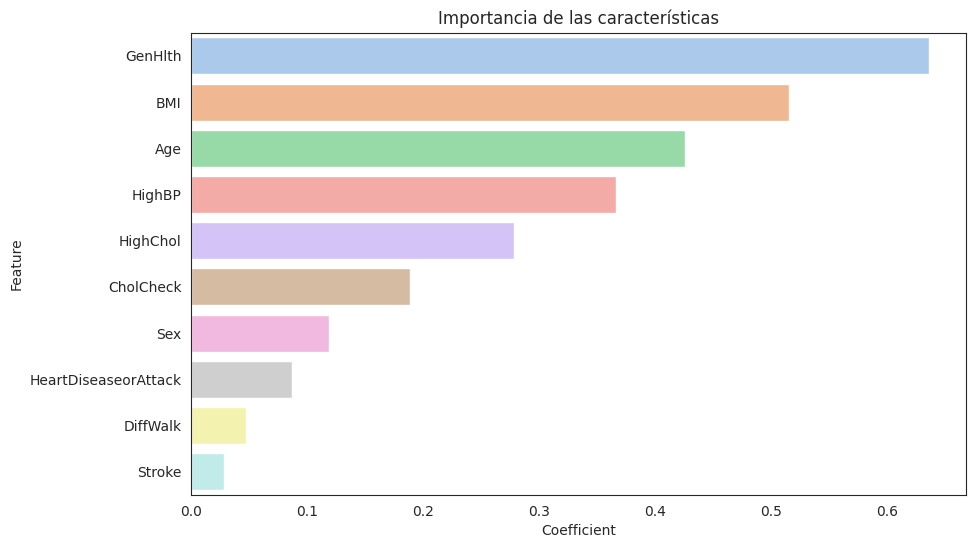

In [ ]:
# Crear un DataFrame con los nombres de las características y los coeficientes correspondientes
feature_importance = pd.DataFrame({'feature': X.columns, 'coefficient': best_model.coef_[0]})

# Filtrar solo los coeficientes positivos
feature_importance = feature_importance[feature_importance['coefficient'] > 0]

# Ordenar en orden descendente según el valor absoluto del coeficiente
feature_importance['abs_coefficient'] = feature_importance['coefficient'].abs()
feature_importance.sort_values(by='abs_coefficient', ascending=False, inplace=True)

# Gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=feature_importance)
plt.title('Importancia de las características')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()

In [ ]:
feature_importance.head(8)['coefficient'].sum()

2.1483233688830756

Podemos encontrar que los resultados del análisis de importancia de las características son más o menos consistentes con los resultados de la correlación.

# Predecir datos de prueba

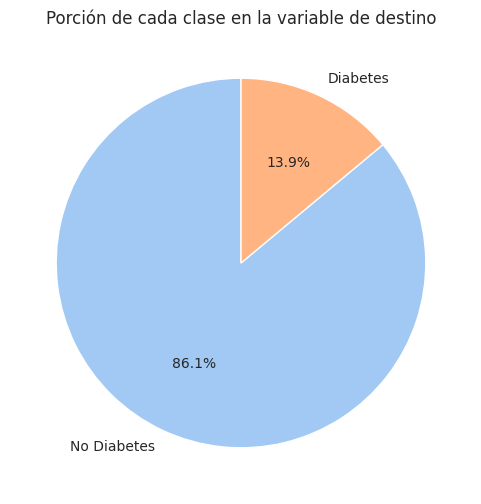

In [ ]:
# tenemos que recordar que los datos están desequilibrados

# trazar la porción de cada clase en la variable de destino como gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(y_test.value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Porción de cada clase en la variable de destino')
plt.show()

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82    218334
         1.0       0.31      0.77      0.44     35346

    accuracy                           0.73    253680
   macro avg       0.63      0.75      0.63    253680
weighted avg       0.86      0.73      0.77    253680

ROC AUC score: 0.7462059529807954


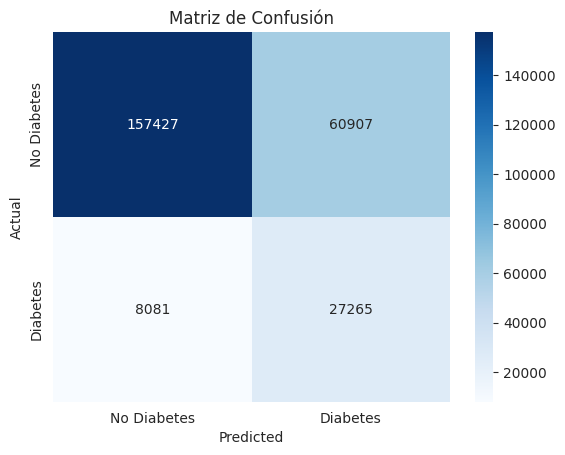

In [ ]:
# predict los datos de prueba
y_test_pred = best_model.predict(X_test)

# 
print(classification_report(y_test, y_test_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_test_pred)}')

# matriz de confusión 
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.yticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión')
plt.show()

La predicción del modelo se ve bien, con un puntaje de precisión de 0.73. Tenga en cuenta que la precisión para la clase positiva (Diabetes) es muy baja. Esto se debe a que el conjunto de datos está desequilibrado.

El puntaje ROC AUC es 0.75, lo cual no está mal. También podemos encontrar eso en la curva auc-roc.

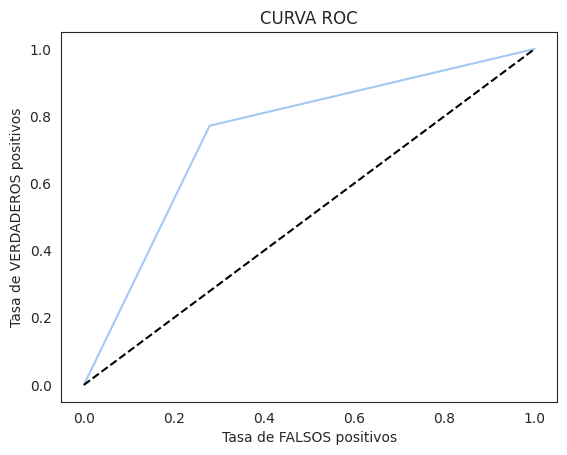

In [ ]:
#Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('Tasa de FALSOS positivos')
plt.ylabel('Tasa de VERDADEROS positivos')
plt.title('CURVA ROC')
plt.show()

#Conclusión
¿Cuáles son los indicadores más importantes de la diabetes?

Tanto el análisis de correlación como el de importancia de características muestran que los indicadores más importantes son:

* Estado de salud 
* Hipertensión
* IMC alto
* Colesterol alto
* Edad
* Dificultades para caminar
* Tener una enfermedad cardíaca o un ataque
* Ingreso
Curiosamente, los hábitos de salud no son los indicadores más importantes.

Al entrenar un modelo de regresión logística, podemos predecir la diabetes con una puntuación de precisión de 0,73 después de la selección del modelo y el ajuste de hiperparámetros.

Los indicadores enumerados anteriormente juntos pueden contribuir en un 91,5 % al rendimiento del modelo.